# Problem Set #1: Supervised Learning
[**Problem_set_1.pdf**](https://github.com/hsneto/stanford_cs229/blob/master/problem_sets/problem_set_1/ps1.pdf)

## 1. Logistic Regression

### 1.a)
**Notes:**

$i)$ If $g(z)=\frac{1}{1+e^{-z}}$, then

\begin{align*}
    \frac{\partial g(z)}{\partial z} = \frac{e^{-z}}{(1+e^{-z})^2} = g(z)(1-g(z))
\end{align*}

$ii)$ For $h(x)=g(\theta^Tx)$, we have

\begin{align*}
    \frac{\partial h(x)}{\partial \theta_k} = h(x)(1-h(x))x_k
\end{align*}

$iii)$

\begin{align*}
    \frac{\partial}{\partial \theta_k}log(1+e^{-yx^T\theta}) = \frac{1}{1+e^{-yx^T\theta}}yx = -h_\theta (-yx)yx
\end{align*}

Thus we have

\begin{align*}
    \frac{\partial}{\partial \theta_k}J(\theta) 
        &= \frac{\partial}{\partial \theta_k}\Bigg[\frac{1}{m}\sum_{k=1}^m log(1+e^{-y^{(i)}\theta^Tx^{(i)}})\Bigg] \\
        &= \frac{1}{m}\sum_{k=1}^m \frac{1}{1+e^{-y^{(i)}\theta^Tx^{(i)}}}y^{(i)}x_k^{(i)} \\
        &= -\frac{1}{m}\sum_{k=1}^m h_\theta(-y^{(i)}x^{(i)})y^{(i)}x_k^{(i)}
\end{align*}

Therefore, the Hessian will be

\begin{align*}
    H_{kl} &= \frac{\partial^2}{\partial \theta_k \partial \theta_l}J(\theta) \\
        &= -\frac{1}{m}\sum_{k=1}^m \frac{\partial}{\partial \theta_l}\Bigg[h_\theta(-y^{(i)}x^{(i)})y^{(i)}x_k^{(i)}\Bigg] \\
        &= \frac{1}{m}\sum_{k=1}^m h_\theta(-y^{(i)}x^{(i)})(1-h_\theta(-y^{(i)}x^{(i)}))y^{(i)}x_l^{(i)}y^{(i)}x_k^{(i)} \\
        &= \frac{1}{m}\sum_{k=1}^m h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))x_l^{(i)}x_k^{(i)}
\end{align*}

So, 

\begin{align*}
    H = \frac{1}{m}\sum_{i=1}^m h(x^{(i)})(1-h(x^{(i)}))x^{(i)}x^{(i)T}
\end{align*}

To prove $H$ is positive semidefinite, we show $z^THz \geq 0$ for all $z$:

\begin{align*}
    z^THz 
        &= \frac{1}{m}z^T\Bigg(\sum_{i=1}^m h(x^{(i)})(1-h(x^{(i)}))x^{(i)}x^{(i)T} \Bigg)z \\
        &= \frac{1}{m}\sum_{i=1}^m h(x^{(i)})(1-h(x^{(i)}))z^Tx^{(i)}x^{(i)T}z \\
        &= \frac{1}{m}\sum_{i=1}^m h(x^{(i)})(1-h(x^{(i)}))(z^Tx^{(i)})^2 \geq 0
\end{align*}

The last inequality holds, because $0\leq h(x^{(i)})\leq 1$, which implies $h(x^{(i)})(1-h(x^{(i)})) \geq 0$, and $(z^Tx^{(i)})^2 \geq 0$.

Hence, $J(\theta)$ is convex and it has no local minima.

### 1.b)

**Data:**
- [logistic_x.txt](http://cs229.stanford.edu/ps/ps1/logistic_x.txt)
- [logistic_y.txt](http://cs229.stanford.edu/ps/ps1/logistic_y.txt)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep='\ +', header=None, engine='python')
y = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', sep='\ +', header=None, engine='python').values

X = pd_X.values
y = y.astype(int)

The generalization of Newton's method (also called the Newton-Raphson method) is given by

\begin{align*}
    \theta := \theta - H^{-1}\nabla_{\theta}l(\theta)
\end{align*}

Note, the $H$ in the denominator may not be a valid mathematical expression as it is actually an inverse operation.

**Notes:**

$i)$

\begin{align*}
    h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}
\end{align*}

$ii)$

\begin{align*}
    \frac{\partial}{\partial \theta_k}J(\theta) 
        &= \frac{\partial}{\partial \theta_k}\Bigg[\frac{1}{m}\sum_{k=1}^m log(1+e^{-y^{(i)}\theta^Tx^{(i)}})\Bigg] \\
        &= \frac{1}{m}\sum_{k=1}^m \frac{1}{1+e^{-y^{(i)}\theta^Tx^{(i)}}}y^{(i)}x_k^{(i)} \\
        &= -\frac{1}{m}\sum_{k=1}^m h_\theta(-y^{(i)}x^{(i)})y^{(i)}x_k^{(i)}
\end{align*}

$iii)$

\begin{align*}
    H_{kl} &= \frac{\partial^2}{\partial \theta_k \partial \theta_l}J(\theta) \\
        &= -\frac{1}{m}\sum_{k=1}^m \frac{\partial}{\partial \theta_l}\Bigg[h_\theta(-y^{(i)}x^{(i)})y^{(i)}x_k^{(i)}\Bigg] \\
        &= \frac{1}{m}\sum_{k=1}^m h_\theta(-y^{(i)}x^{(i)})(1-h_\theta(-y^{(i)}x^{(i)}))y^{(i)}x_l^{(i)}y^{(i)}x_k^{(i)} \\
        &= \frac{1}{m}\sum_{k=1}^m h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))x_l^{(i)}x_k^{(i)}
\end{align*}
\begin{align*}
    \Big\Downarrow 
\end{align*}
\begin{align*}
    H = \frac{1}{m}\sum_{i=1}^m h(x^{(i)})(1-h(x^{(i)}))x^{(i)}x^{(i)T}
\end{align*}

In [2]:
class Logistic_regression(object):
    def __init__(self, epochs = 100, error_max = 1e-3):
        self.epochs = epochs
        self.error_max = error_max
        
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weight_ = np.zeros(X.shape[1]) 
        it, error = 0, 0.
        self.weight_list_ = []
        self.weight_list_.append(self.weight_.copy())

        while it<self.epochs:
            z = y * X
            grad = self.gradient(z)
            H = self.hessian(X)
            aux = np.linalg.inv(H).dot(grad) 
            self.weight_ -= aux

            self.weight_list_.append(self.weight_.copy())
            error = np.sum(abs(self.weight_list_[-1] - self.weight_list_[-2]))
            it += 1
            
            if(error <= self.error_max):
                break
                
    def hypotheses(self, z):
        return 1/(1 + np.exp(-z.dot(self.weight_)))
    
    def gradient(self, z):
        return np.mean(-self.hypotheses(-z)*z.T, axis=1)
    
    def hessian(self, X):
        return (((self.hypotheses(X)*(1-self.hypotheses(X)))*X.T).dot(X))/X.shape[0]


In [3]:
classifier = Logistic_regression(epochs=20)
classifier.fit(X, y)
classifier.weight_

array([-2.6205116 ,  0.76037154,  1.17194674])

### 1.c)

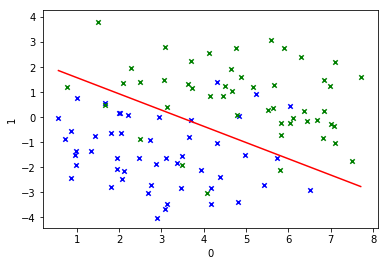

In [10]:
pd_X['label'] = y
ax = plt.axes()

pd_X.query('label == -1').plot.scatter(0, 1, ax=ax, marker='x', color='b')
pd_X.query('label == 1').plot.scatter(0, 1, ax=ax, marker='x', color='g')

_xs = np.array([np.min(X[:,0]), np.max(X[:,0])])
_ys = (classifier.weight_[0] + classifier.weight_[1] * _xs) / (- classifier.weight_[2])
plt.plot(_xs, _ys, 'r')

## 2. Poisson regression and the exponential family
[Solution](https://github.com/hsneto/stanford_cs229/blob/master/problem_sets/problem_set_1/ps1_solution_2.ipynb)

## 3. Gaussian discriminant analysis
[Solution](https://github.com/hsneto/stanford_cs229/blob/master/problem_sets/problem_set_1/ps1_solution_3.ipynb)

## 4.  Linear invariance of optimization algorithms
[Solution](https://github.com/hsneto/stanford_cs229/blob/master/problem_sets/problem_set_1/ps1_solution_4.ipynb)

## 5.  Regression for denoising quasar spectra
[Solution](https://github.com/hsneto/stanford_cs229/blob/master/problem_sets/problem_set_1/ps1_solution_5.ipynb)